In [306]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import levene
from scipy.stats import shapiro
#from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import scale
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
#from lightgbm import LGBMRegressor, LGBMClassifier
#from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
#import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical


print("RUTA de IMAGENES")

filterwarnings("ignore", category=DeprecationWarning) 
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

Meat_Data_Data = Path("CarneDataset\\train\\CLASS_02")
# main path


JPG_Path = list(Meat_Data_Data.glob(r"*/*.jpg"))
# jpg path


print(JPG_Path[0:5])

RUTA de IMAGENES
[WindowsPath('CarneDataset/train/CLASS_02/Fresh/05-CAPTURE_20220421_053226_860.jpg'), WindowsPath('CarneDataset/train/CLASS_02/Fresh/05-CAPTURE_20220421_053523_498.jpg'), WindowsPath('CarneDataset/train/CLASS_02/Fresh/05-CAPTURE_20220421_053558_105.jpg'), WindowsPath('CarneDataset/train/CLASS_02/Fresh/05-CAPTURE_20220421_054132_775.jpg'), WindowsPath('CarneDataset/train/CLASS_02/Fresh/10-CAPTURE_20220531_103042_241.jpg')]


In [307]:
Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],JPG_Path))
# splitting fresh and spoiled

In [308]:
print(Labels.count("Fresh"))

60


In [309]:
print(Labels.count("Spoiled"))

60


In [310]:
File_Path = pd.Series(JPG_Path, name="JPG").astype(str)

In [311]:
print(File_Path.head())

0    CarneDataset\train\CLASS_02\Fresh\05-CAPTURE_2...
1    CarneDataset\train\CLASS_02\Fresh\05-CAPTURE_2...
2    CarneDataset\train\CLASS_02\Fresh\05-CAPTURE_2...
3    CarneDataset\train\CLASS_02\Fresh\05-CAPTURE_2...
4    CarneDataset\train\CLASS_02\Fresh\10-CAPTURE_2...
Name: JPG, dtype: object


In [312]:
Label_Name = pd.Series(Labels, name="CATEGORY")

In [313]:
print(Label_Name.head())

0    Fresh
1    Fresh
2    Fresh
3    Fresh
4    Fresh
Name: CATEGORY, dtype: object


In [314]:
print(Label_Name.value_counts())

Fresh      60
Spoiled    60
Name: CATEGORY, dtype: int64


In [315]:
Main_Data = pd.concat([File_Path, Label_Name], axis=1)

In [316]:
Main_Data = Main_Data.sample(frac=1).reset_index(drop=True)

In [317]:
print(Main_Data.head())

                                                 JPG CATEGORY
0  CarneDataset\train\CLASS_02\Fresh\20-CAPTURE_2...    Fresh
1  CarneDataset\train\CLASS_02\Spoiled\23-CAPTURE...  Spoiled
2  CarneDataset\train\CLASS_02\Fresh\17-CAPTURE_2...    Fresh
3  CarneDataset\train\CLASS_02\Fresh\17-CAPTURE_2...    Fresh
4  CarneDataset\train\CLASS_02\Fresh\10-CAPTURE_2...    Fresh


In [318]:
print(Main_Data["CATEGORY"].value_counts())

Fresh      60
Spoiled    60
Name: CATEGORY, dtype: int64


In [319]:
Fresh_Meat = Main_Data[Main_Data["CATEGORY"] == "Fresh"]
Spoiled_Meat = Main_Data[Main_Data["CATEGORY"] == "Spoiled"]

In [320]:
print(Fresh_Meat.head())

                                                 JPG CATEGORY
0  CarneDataset\train\CLASS_02\Fresh\20-CAPTURE_2...    Fresh
2  CarneDataset\train\CLASS_02\Fresh\17-CAPTURE_2...    Fresh
3  CarneDataset\train\CLASS_02\Fresh\17-CAPTURE_2...    Fresh
4  CarneDataset\train\CLASS_02\Fresh\10-CAPTURE_2...    Fresh
7  CarneDataset\train\CLASS_02\Fresh\23-CAPTURE_2...    Fresh


In [321]:
print(Spoiled_Meat.head())

                                                  JPG CATEGORY
1   CarneDataset\train\CLASS_02\Spoiled\23-CAPTURE...  Spoiled
5   CarneDataset\train\CLASS_02\Spoiled\20-CAPTURE...  Spoiled
6   CarneDataset\train\CLASS_02\Spoiled\22-CAPTURE...  Spoiled
11  CarneDataset\train\CLASS_02\Spoiled\10-CAPTURE...  Spoiled
12  CarneDataset\train\CLASS_02\Spoiled\05-CAPTURE...  Spoiled


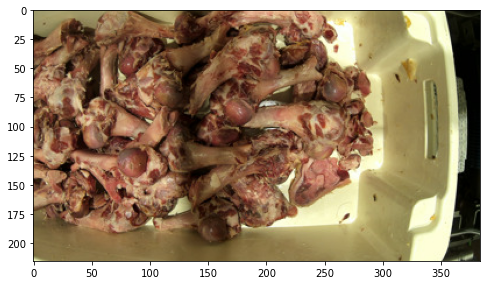

In [322]:
figure = plt.figure(figsize=(8, 8))
plt.imshow(plt.imread(Main_Data["JPG"][1]))
plt.show()

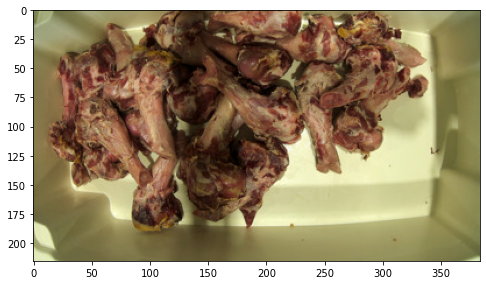

In [323]:
figure = plt.figure(figsize=(8,8))
plt.imshow(plt.imread(Main_Data["JPG"][2]))
plt.show()

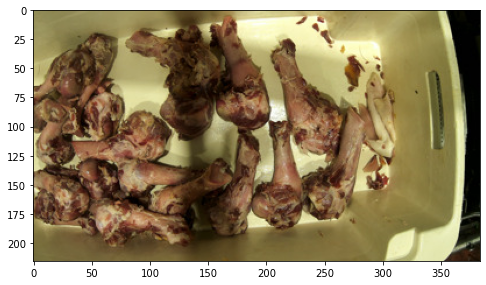

In [324]:
figure = plt.figure(figsize=(8,8))
plt.imshow(plt.imread(Fresh_Meat["JPG"][10]))
plt.show()

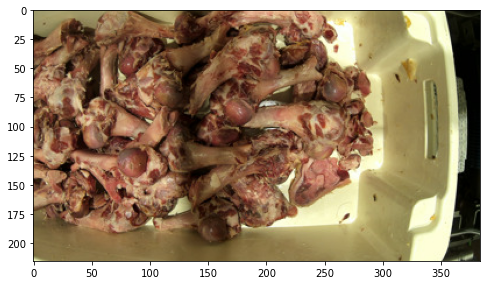

In [325]:
figure = plt.figure(figsize=(8,8))
plt.imshow(plt.imread(Spoiled_Meat["JPG"][1]))
plt.show()

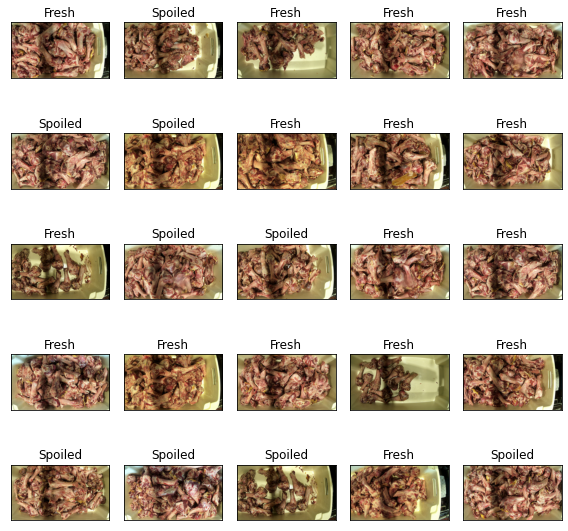

In [326]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(8, 8), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data["JPG"][i]))
    ax.set_title(Main_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

In [327]:
Train_Data, Test_Data = train_test_split(Main_Data, train_size=0.8, shuffle=True, random_state=42)

In [328]:
print(Train_Data.shape)

(96, 2)


In [329]:
Data_Generator = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [330]:
Train_Gen = Data_Generator.flow_from_dataframe(dataframe=Train_Data,
                                               x_col="JPG",
                                               y_col="CATEGORY",
                                               shuffle=True,seed=42,
                                               color_mode="rgb",
                                               class_mode="categorical",
                                               batch_size=32,
                                               subset="training")

Found 77 validated image filenames belonging to 2 classes.


In [331]:
print(Train_Gen.classes[0:20])

[0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]


In [332]:
print(Train_Gen.split)

(0.2, 1)


In [333]:
Test_Gen = Data_Generator.flow_from_dataframe(dataframe=Test_Data,
                                               x_col="JPG",
                                               y_col="CATEGORY",
                                               shuffle=False,seed=42,
                                               color_mode="rgb",
                                               class_mode="categorical",
                                               batch_size=32)

Found 24 validated image filenames belonging to 2 classes.


In [334]:
print(Test_Gen.classes[0:20])

[1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1]


In [335]:
print(Test_Gen.split)

None


In [336]:
Validation_Gen = Data_Generator.flow_from_dataframe(dataframe=Train_Data,
                                               x_col="JPG",
                                               y_col="CATEGORY",
                                               shuffle=True,seed=42,
                                               color_mode="rgb",
                                               class_mode="categorical",
                                               batch_size=32,
                                               subset="validation")

Found 19 validated image filenames belonging to 2 classes.


In [337]:
print(Validation_Gen.classes[0:20])

[0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0]


In [338]:
print(Validation_Gen.split)

(0, 0.2)


In [339]:
model = tf.keras.models.Sequential([
  
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Flatten(input_shape=(113,)),
  
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  
  tf.keras.layers.Dense(2,activation="softmax")
])

In [340]:
model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=["accuracy"])

In [341]:
Call_Back = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=2)

In [342]:
ANN_Model = model.fit(Train_Gen,
                     validation_data=Validation_Gen,
                     epochs=10,batch_size=5,
                     callbacks=Call_Back)

Epoch 1/10
3/3 [==============================] - 2s 653ms/step - loss: 0.8017 - accuracy: 0.4156 - val_loss: 0.7494 - val_accuracy: 0.4211
Epoch 2/10
3/3 [==============================] - 1s 490ms/step - loss: 0.7289 - accuracy: 0.5065 - val_loss: 0.7170 - val_accuracy: 0.4211
Epoch 3/10
3/3 [==============================] - 1s 441ms/step - loss: 0.7139 - accuracy: 0.6234 - val_loss: 0.7255 - val_accuracy: 0.4211
Epoch 4/10
3/3 [==============================] - 1s 489ms/step - loss: 0.6939 - accuracy: 0.5325 - val_loss: 0.7229 - val_accuracy: 0.4211
Epoch 5/10
3/3 [==============================] - 2s 540ms/step - loss: 0.6958 - accuracy: 0.5455 - val_loss: 0.7210 - val_accuracy: 0.4211
Epoch 6/10
3/3 [==============================] - 2s 521ms/step - loss: 0.6997 - accuracy: 0.5844 - val_loss: 0.7401 - val_accuracy: 0.4211


In [343]:
Model_Results = model.evaluate(Test_Gen,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])


LOSS:  0.7742
ACCURACY:  0.33


In [344]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, None, None, None)  0         
                                                                 
 flatten_5 (Flatten)         (None, None)              0         
                                                                 
 dense_15 (Dense)            (None, 128)               25165952  
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 2)                

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


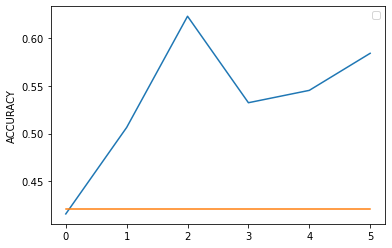

In [345]:
plt.plot(ANN_Model.history["accuracy"])
plt.plot(ANN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

In [346]:
HistoryDict = ANN_Model.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)

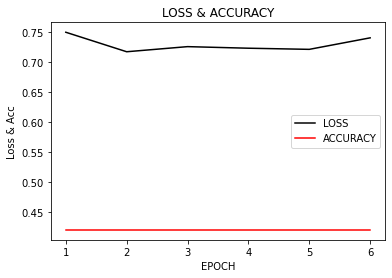

In [347]:
plt.plot(epochs,val_losses,"k-",label="LOSS")
plt.plot(epochs,val_acc,"r",label="ACCURACY")
plt.title("LOSS & ACCURACY")
plt.xlabel("EPOCH")
plt.ylabel("Loss & Acc")
plt.legend()
plt.show()

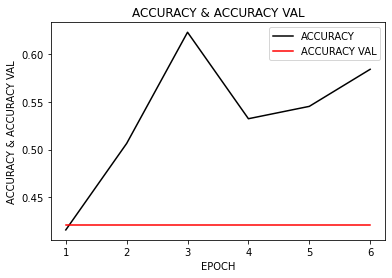

In [348]:
plt.plot(epochs,acc,"k-",label="ACCURACY")
plt.plot(epochs,val_acc,"r",label="ACCURACY VAL")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

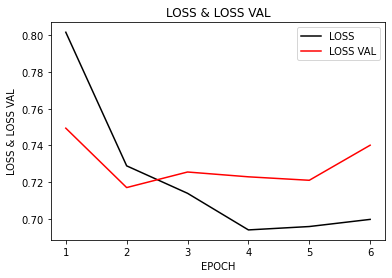

In [349]:
plt.plot(epochs, losses, "k-", label="LOSS")
plt.plot(epochs, val_losses, "r", label="LOSS VAL")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

<AxesSubplot:>

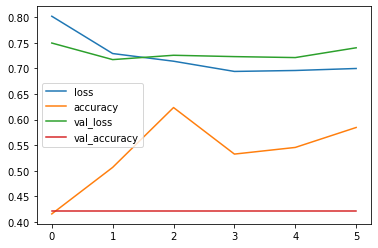

In [350]:
Dict_Summary = pd.DataFrame(ANN_Model.history)
Dict_Summary.plot()

In [351]:
Model_Predict = model.predict(Test_Gen)

1/1 [==============================] - 0s 147ms/step


In [352]:
Model_Predict = np.argmax(Model_Predict,axis=1)

In [353]:
Predict_Label = (Test_Gen.class_indices)
Predict_Label = dict((v, k) for k, v in Predict_Label.items())

In [354]:
Model_Predict = [Predict_Label[k] for k in Model_Predict]

In [355]:
print(Model_Predict[:10])

['Fresh', 'Fresh', 'Fresh', 'Fresh', 'Fresh', 'Fresh', 'Fresh', 'Fresh', 'Fresh', 'Fresh']


In [356]:
Test_Results = list(Test_Data["CATEGORY"])

In [357]:
Class_Report = classification_report(Test_Results,Model_Predict)
print(Class_Report)

              precision    recall  f1-score   support

       Fresh       0.33      1.00      0.50         8
     Spoiled       0.00      0.00      0.00        16

    accuracy                           0.33        24
   macro avg       0.17      0.50      0.25        24
weighted avg       0.11      0.33      0.17        24



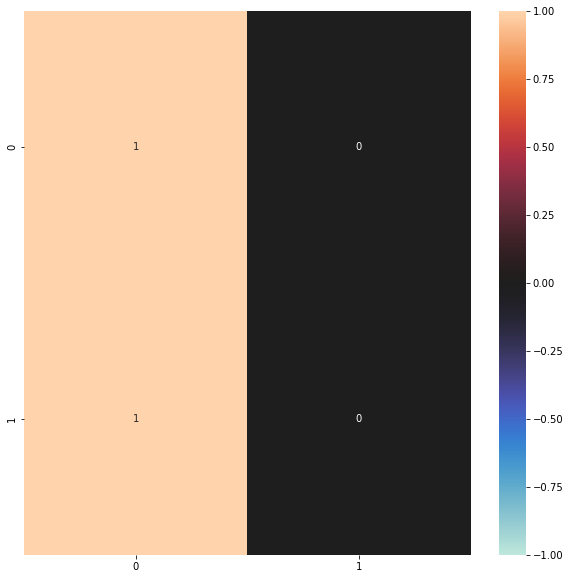

In [358]:
Conf_Report = confusion_matrix(Test_Results,Model_Predict, normalize="true")
figure = plt.figure(figsize=(10,10))
sns.heatmap(Conf_Report,vmax=1,center=0,vmin=-1,annot=True)
plt.show()

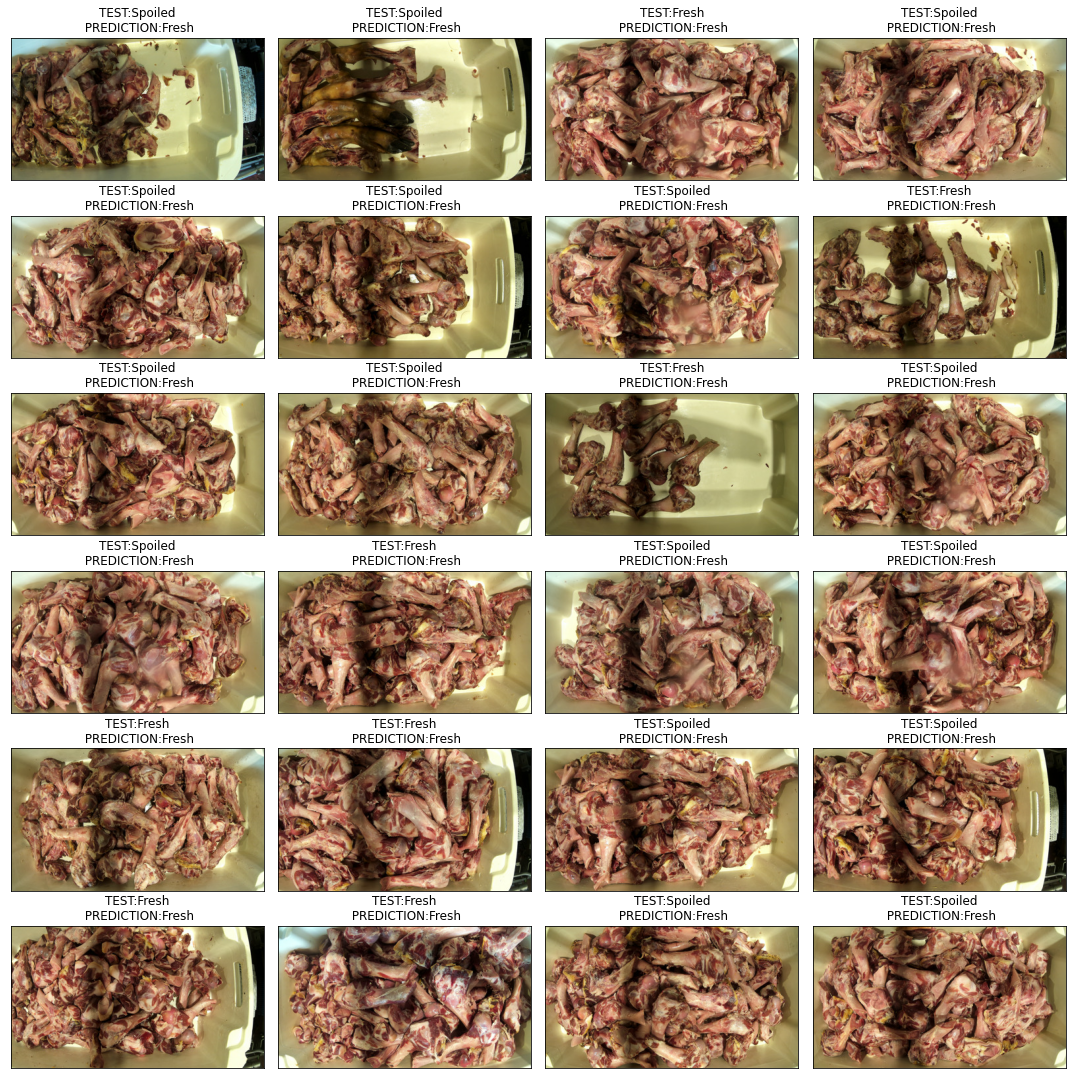

In [359]:
fig, axes = plt.subplots(nrows=6,
                         ncols=4,
                         figsize=(15, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Test_Data["JPG"].iloc[i]))
    ax.set_title(f"TEST:{Test_Data.CATEGORY.iloc[i]}\n PREDICTION:{Model_Predict[i]}")
plt.tight_layout()
plt.show()